# Support Vector Machine & kNN

This notebook deploys a support vector machine (SVM) and a k-Nearest-Neighbor (kNN) model using R.



<h3 id="Clear-environment-(RStudio)">Clear environment (RStudio)<a class="anchor-link" href="#Clear-environment-(RStudio)">¶</a></h3>


In [1]:

# rm(list = ls())




<h3 id="Load-libraries-&amp;-set-seed">Load libraries &amp; set seed<a class="anchor-link" href="#Load-libraries-&amp;-set-seed">¶</a></h3><ul>
<li>kernlab contains ksvm model which is a support vector machine</li>
<li>kknn contains the k nearest neighbor model</li>
<li>setting the random seed allows for reproducibility of results</li>
<li>require guarantees library is installed or an error is thrown</li>
</ul>


In [2]:

library(kernlab)
library(kknn)
require(kernlab)
require(kknn)
set.seed(37)



Warning message:
"package 'kknn' was built under R version 3.4.2"


<h3 id="Load-in-data">Load in data<a class="anchor-link" href="#Load-in-data">¶</a></h3><ul>
<li>The dataset used for this notebook is the credit card dataset from UC Irvine https://archive.ics.uci.edu/ml/datasets/Credit+Approval</li>
<li>I like my data with headers so header = TRUE</li>
</ul>


In [3]:

data <- read.table("credit_card_data-headers.txt", stringsAsFactors = FALSE, header = TRUE)




<h3 id="Check-head-of-credit_card_data-R-DataFrame">Check head of credit_card_data R DataFrame<a class="anchor-link" href="#Check-head-of-credit_card_data-R-DataFrame">¶</a></h3><ul>
<li>"head" refers to the first 6 rows of an R DataFrame object</li>
</ul>


In [4]:

head(data)



A1,A2,A3,A8,A9,A10,A11,A12,A14,A15,R1
1,30.83,0.000,1.25,1,0,1,1,202,0,1
0,58.67,4.460,3.04,1,0,6,1,43,560,1
0,24.50,0.500,1.50,1,1,0,1,280,824,1
1,27.83,1.540,3.75,1,0,5,0,100,3,1
1,20.17,5.625,1.71,1,1,0,1,120,0,1
1,32.08,4.000,2.50,1,1,0,0,360,0,1



<h3 id="Show-all-column-names">Show all column names<a class="anchor-link" href="#Show-all-column-names">¶</a></h3><ul>
<li>attributes will give you the names of columns in an R DataFrame</li>
<li>column names are accessible by the "names" property</li>
</ul>


In [5]:

attributes(data)$names



[1] "A1"  "A2"  "A3"  "A8"  "A9"  "A10" "A11" "A12" "A14" "A15" "R1"


<h3 id="Check-the-str-of-credit_card_data-R-DataFrame-object">Check the str of credit_card_data R DataFrame object<a class="anchor-link" href="#Check-the-str-of-credit_card_data-R-DataFrame-object">¶</a></h3><ul>
<li>str takes an R DataFrame object as input</li>
<li>str of an R DataFrame returns basic type info for all vectors in the input R DataFrame<ul>
<li>All features of the source credit_card_data DataFrame are of type num (float) or int</li>
<li>The source credit_card_data DataFrame response variable is also an int</li>
</ul>
</li>
</ul>


In [6]:

str(data)



'data.frame':	654 obs. of  11 variables:
 $ A1 : int  1 0 0 1 1 1 1 0 1 1 ...
 $ A2 : num  30.8 58.7 24.5 27.8 20.2 ...
 $ A3 : num  0 4.46 0.5 1.54 5.62 ...
 $ A8 : num  1.25 3.04 1.5 3.75 1.71 ...
 $ A9 : int  1 1 1 1 1 1 1 1 1 1 ...
 $ A10: int  0 0 1 0 1 1 1 1 1 1 ...
 $ A11: int  1 6 0 5 0 0 0 0 0 0 ...
 $ A12: int  1 1 1 0 1 0 0 1 1 0 ...
 $ A14: int  202 43 280 100 120 360 164 80 180 52 ...
 $ A15: int  0 560 824 3 0 0 31285 1349 314 1442 ...
 $ R1 : int  1 1 1 1 1 1 1 1 1 1 ...



<p>As pointed out in the HW1 overview on Canvas, our dataset contains 6 continuous variables and 4 binary variables</p>



<h3 id="Check-the-summary-of-credit_card_data-R-DataFrame-object">Check the summary of credit_card_data R DataFrame object<a class="anchor-link" href="#Check-the-summary-of-credit_card_data-R-DataFrame-object">¶</a></h3><ul>
<li>summary takes an R DataFrame object as input</li>
<li>summary returns basic statistical info for all vectors in the input R DataFrame<ul>
<li>basic statistical info includes:<ul>
<li>min of vector</li>
<li>Q1 of vector</li>
<li>median of vector</li>
<li>mean of vector</li>
<li>Q3 of vector</li>
<li>max of vector</li>
</ul>
</li>
</ul>
</li>
</ul>


In [7]:

summary(data)



       A1               A2              A3               A8        
 Min.   :0.0000   Min.   :13.75   Min.   : 0.000   Min.   : 0.000  
 1st Qu.:0.0000   1st Qu.:22.58   1st Qu.: 1.040   1st Qu.: 0.165  
 Median :1.0000   Median :28.46   Median : 2.855   Median : 1.000  
 Mean   :0.6896   Mean   :31.58   Mean   : 4.831   Mean   : 2.242  
 3rd Qu.:1.0000   3rd Qu.:38.25   3rd Qu.: 7.438   3rd Qu.: 2.615  
 Max.   :1.0000   Max.   :80.25   Max.   :28.000   Max.   :28.500  
       A9              A10              A11              A12        
 Min.   :0.0000   Min.   :0.0000   Min.   : 0.000   Min.   :0.0000  
 1st Qu.:0.0000   1st Qu.:0.0000   1st Qu.: 0.000   1st Qu.:0.0000  
 Median :1.0000   Median :1.0000   Median : 0.000   Median :1.0000  
 Mean   :0.5352   Mean   :0.5612   Mean   : 2.498   Mean   :0.5382  
 3rd Qu.:1.0000   3rd Qu.:1.0000   3rd Qu.: 3.000   3rd Qu.:1.0000  
 Max.   :1.0000   Max.   :1.0000   Max.   :67.000   Max.   :1.0000  
      A14               A15              


<h3 id="Create-support-vector-machine-model">Create support vector machine model<a class="anchor-link" href="#Create-support-vector-machine-model">¶</a></h3><ul>
<li>svm documentation <a href="https://www.rdocumentation.org/packages/kernlab/versions/0.9-25/topics/ksvm">https://www.rdocumentation.org/packages/kernlab/versions/0.9-25/topics/ksvm</a></li>
</ul>
<p>"ksvm"(x, y = NULL, scaled = TRUE, type = NULL, kernel ="rbfdot", kpar = "automatic", C = 1, nu = 0.2, epsilon = 0.1, prob.model = FALSE, class.weights = NULL, cross = 0, fit = TRUE, cache = 40, tol = 0.001, shrinking = TRUE, ...,  subset, na.action = na.omit)</p>



<p>C = lambda^-1</p>
<ul>
<li>all kernel options:<ul>
<li>rbfdot: Radial Basis kernel "Gaussian"</li>
<li>polydot: Polynomial kernel</li>
<li>vanilladot: Linear kernel</li>
<li>tanhdot: Hyperbolic tangent kernel</li>
<li>laplacedot: Laplacian kernel</li>
<li>besseldot: Bessel kernel</li>
<li>anovadot: ANOVA RBF kernel</li>
<li>splinedot: Spline kernel</li>
<li>stringdot: String kernel</li>
</ul>
</li>
</ul>
<p>Since our input data is numeric and binary, we are limited to the kernel choices listed below:</p>
<ul>
<li>potential kernel options:<ul>
<li>rbfdot: Radial Basis kernel "Gaussian"</li>
<li>polydot: Polynomial kernel</li>
<li>vanilladot: Linear kernel</li>
<li>tanhdot: Hyperbolic tangent kernel</li>
</ul>
</li>
</ul>
<p>First lets try the "vanilladot" Linear kernel per the homework writeup. For starters, lets try C=100.</p>



<h3 id="Support-vector-machine-|-Linear-kernel-|-C=100">Support vector machine | Linear kernel | C=100<a class="anchor-link" href="#Support-vector-machine-|-Linear-kernel-|-C=100">¶</a></h3>


In [8]:

svm_model_linear = ksvm(as.matrix(data[,1:10]),as.factor(data[,11]), type= "C-svc", kernel="vanilladot", C=100, scaled=TRUE)
svm_model_linear



 Setting default kernel parameters  


Support Vector Machine object of class "ksvm" 

SV type: C-svc  (classification) 
 parameter : cost C = 100 

Linear (vanilla) kernel function. 

Number of Support Vectors : 189 

Objective Function Value : -17887.92 
Training error : 0.136086 


<h3 id="Calculate-model-coefficients">Calculate model coefficients<a class="anchor-link" href="#Calculate-model-coefficients">¶</a></h3><ul>
<li>in order to calculate our models' coefficients we must first take the colSum of the different features<ul>
<li>svm_model features are accessible by the @ operator<ul>
<li>we want the product of the xmatrix and the coefs</li>
</ul>
</li>
</ul>
</li>
</ul>


In [9]:

# checking the head of the xmatrix

head(svm_model_linear@xmatrix[[1]])



,A1,A2,A3,A8,A9,A10,A11,A12,A14,A15
1,0.6703899,-0.06245717,-0.9616313,-0.29434003,0.931259,-1.1299515,-0.3017670,0.9255499,0.1302071028,-0.1929261
5,0.6703899,-0.95214066,0.1581515,-0.15780899,0.931259,0.8836405,-0.5031503,0.9255499,-0.3569725882,-0.1929261
6,0.6703899,0.04186782,-0.1653413,0.07666823,0.931259,0.8836405,-0.5031503,-1.0787867,1.0689191904,-0.1929261
9,0.6703899,1.90636399,-0.8620951,0.51000589,0.931259,0.8836405,-0.5031503,0.9255499,-0.0004996435,-0.1331088
11,0.6703899,-0.79273208,-0.7964012,-0.02276198,-1.072173,0.8836405,-0.5031503,-1.0787867,-0.3094428622,-0.1929261
12,0.6703899,-0.13840576,-0.5963333,0.62130837,0.931259,0.8836405,-0.5031503,0.9255499,0.4747976160,-0.1548259


In [10]:

# checking the head of the coef values vector

head(svm_model_linear@coef[[1]])



[1] 100.00000 100.00000 100.00000  42.30574 100.00000  52.70686

In [11]:

a1_am <- colSums(svm_model_linear@xmatrix[[1]] * svm_model_linear@coef[[1]])
a1_am



A1            A2            A3            A8            A9 
-0.0010065348 -0.0011729048 -0.0016261967  0.0030064203  1.0049405641 
          A10           A11           A12           A14           A15 
-0.0028259432  0.0002600295 -0.0005349551 -0.0012283758  0.1063633995

### Model Equation

In [12]:

a1_am <- colSums(svm_model_linear@xmatrix[[1]] * svm_model_linear@coef[[1]])
a0 <- svm_model_linear@b

for (i in 1:nrow(as.data.frame(a1_am))) {
    cat(format(round(a1_am[i], 5), nsmall = 3))
    cat( )
    cat(rownames(as.data.frame(a1_am))[i])
    cat(' + ')
  }
cat(-a0)



-0.00101A1 + -0.00117A2 + -0.00163A3 + 0.00301A8 + 1.00494A9 + -0.00283A10 + 0.00026A11 + -0.00053A12 + -0.00123A14 + 0.10636A15 + 0.08158492

In [13]:

# sorted in descending order
# references: http://sites.stat.psu.edu/~drh20/R/html/base/html/sort.html

sort(a1_am, decreasing=TRUE)



A9           A15            A8           A11           A12 
 1.0049405641  0.1063633995  0.0030064203  0.0002600295 -0.0005349551 
           A1            A2           A14            A3           A10 
-0.0010065348 -0.0011729048 -0.0012283758 -0.0016261967 -0.0028259432


<ul>
<li>Attribute A9 is most contributing attribute to the response according to the linear support vector machine model</li>
<li>A reasonable model can be made out of A9 and A15 (coming soon...)<ul>
<li>Lowers model complexity and narrows potential data capture to two attributes instead of 10</li>
</ul>
</li>
</ul>



<h3 id="Calculate-model-intercept">Calculate model intercept<a class="anchor-link" href="#Calculate-model-intercept">¶</a></h3><ul>
<li>to access our models' intercept, we must access the "b" property of the svm_model</li>
</ul>


In [14]:

a0 <- svm_model_linear@b
a0



[1] -0.08158492


<h3 id="Make-predictions-using-model">Make predictions using model<a class="anchor-link" href="#Make-predictions-using-model">¶</a></h3><ul>
<li>to make predictions using our model we must use the predict method on the svm_model<ul>
<li>returns an R vector object [0,1]</li>
</ul>
</li>
</ul>


In [15]:

svm_model_linear_predictions <- predict(svm_model_linear,data[,1:10])
svm_model_linear_predictions



[1] 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [38] 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0
 [75] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
[112] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
[149] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
[186] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1
[223] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1
[260] 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
[297] 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
[334] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[371] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[408] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[445] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
[482] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
[519] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1
[556] 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
[593] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
[630] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
Levels: 0 1

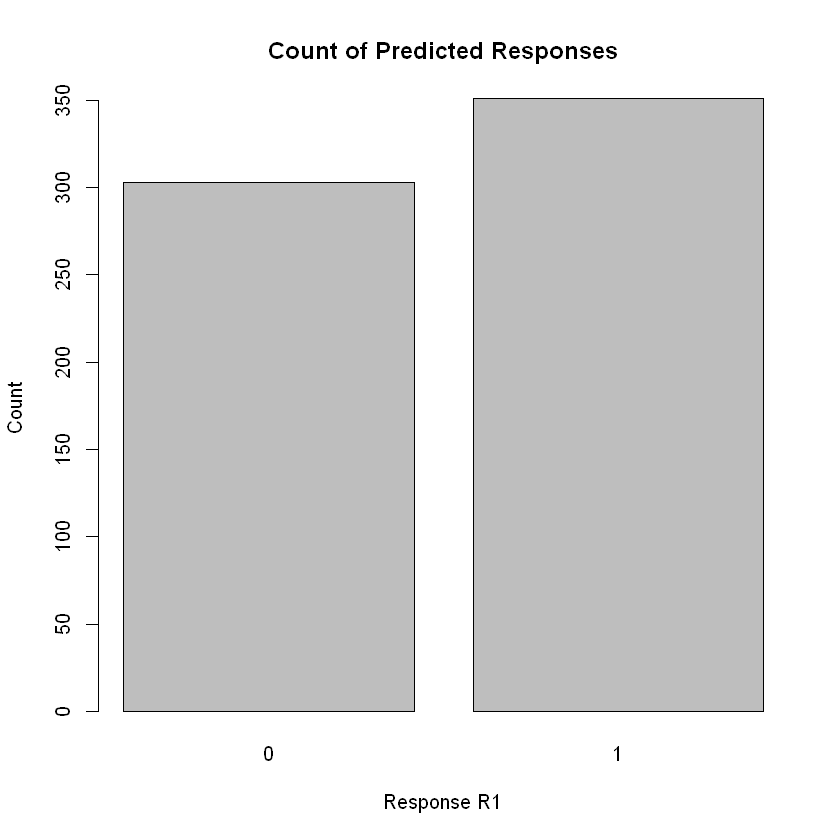

In [16]:

plot(svm_model_linear_predictions, main="Count of Predicted Responses", xlab="Response R1", ylab="Count")




<h3 id="Find-fraction-of-predictions-predicted-correctly">Find fraction of predictions predicted correctly<a class="anchor-link" href="#Find-fraction-of-predictions-predicted-correctly">¶</a></h3><ul>
<li>As denoted by the homework handout, we can use the procedure below to find the fraction of predictions predicted correctly by our model</li>
</ul>


In [17]:

svm_model_linear_predictions <- predict(svm_model_linear,data[,1:10])
percent_pred_correct <- sum(svm_model_linear_predictions == data[,11]) / nrow(data)
percent_pred_correct



[1] 0.8639144


<h3 id="Calculate-model-error">Calculate model error<a class="anchor-link" href="#Calculate-model-error">¶</a></h3><ul>
<li>error method will give us the error associated with the svm_model</li>
<li>model error should just be 1-(fraction of predictions predicted correctly)</li>
</ul>
<p>reference: <a href="https://jangorecki.gitlab.io/data.table/library/kernlab/html/ksvm-class.html">https://jangorecki.gitlab.io/data.table/library/kernlab/html/ksvm-class.html</a></p>


In [18]:

model_error <- error(svm_model_linear)
model_error



[1] 0.1360856

In [19]:

1-(percent_pred_correct + model_error)



[1] 0


<h3 id="Support-vector-machine-|-Linear-kernel-|-C=100-analysis">Support vector machine | Linear kernel | C=100 analysis<a class="anchor-link" href="#Support-vector-machine-|-Linear-kernel-|-C=100-analysis">¶</a></h3><p>Our initial svm_model with a linear kernel and c=100 does pretty well with an error of 0.1361 where error is defined as (1-% predictions correct). The model places the highest importance on the features A9, A15, and A8 (denoted by their corresponding coefficient values). Model intercept is -0.08158. All of this is summarized below:</p>
<p>Important features (in descending order):</p>
<ul>
<li>A9</li>
<li>A15</li>
<li>A8</li>
</ul>
<p>Model intercept:</p>
<ul>
<li>0.08158</li>
</ul>
<p>Error:</p>
<ul>
<li>0.1361</li>
</ul>
<p>% predictions correct:</p>
<ul>
<li>0.8639</li>
</ul>



<h3 id="SVM-model-with-only-A9-and--A15-attributes">SVM model with only A9 and  A15 attributes<a class="anchor-link" href="#SVM-model-with-only-A9-and--A15-attributes">¶</a></h3>


In [20]:

attributes_to_use = c(5,10)



In [21]:

vip_features_only_svm_model_linear = ksvm(as.matrix(data[,attributes_to_use]),as.factor(data[,11]), type= "C-svc", kernel="vanilladot", C=100, scaled=TRUE)
vip_features_only_svm_model_linear



 Setting default kernel parameters  


Support Vector Machine object of class "ksvm" 

SV type: C-svc  (classification) 
 parameter : cost C = 100 

Linear (vanilla) kernel function. 

Number of Support Vectors : 182 

Objective Function Value : -17891.81 
Training error : 0.136086 

In [22]:

vip_features_only_model_error <- error(vip_features_only_svm_model_linear)
vip_features_only_model_error



[1] 0.1360856


<h3 id="Comparison-to-model-with-all-attributes">Comparison to model with all attributes<a class="anchor-link" href="#Comparison-to-model-with-all-attributes">¶</a></h3>


In [23]:

vip_features_only_model_error - model_error



[1] 0

### SVM Plot: A9 and A15 | C = [0.01 , 100000]

Lets visually see the effects different values of C = lambda^-1 have on model

Run cell below if first time running - may need to run it from R console in RStudio

In [24]:

# install.packages("e1071")
library(e1071)
require(e1071)



Warning message:
"package 'e1071' was built under R version 3.4.3"

In [25]:

Class=as.factor(data$R1)
A9 = as.vector(data$A9)
A15 = as.vector(data$A15)
a9_a15_data <- data.frame(Class,A9, A15)



### C = 0.01

In [26]:

svm_full=svm(Class ~ ., data=a9_a15_data, kernel="linear", cost=0.01, scale=F, type="C-classification")



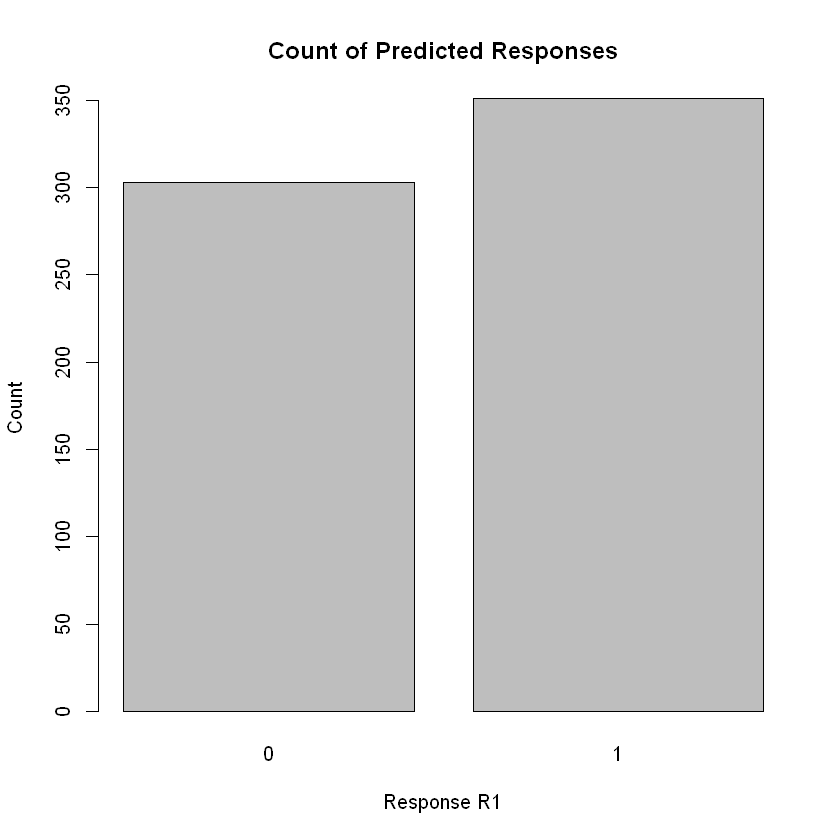

In [27]:

p_fullmodel=predict (svm_full, a9_a15_data, type="class") 
plot(p_fullmodel, main="Count of Predicted Responses", xlab="Response R1", ylab="Count")



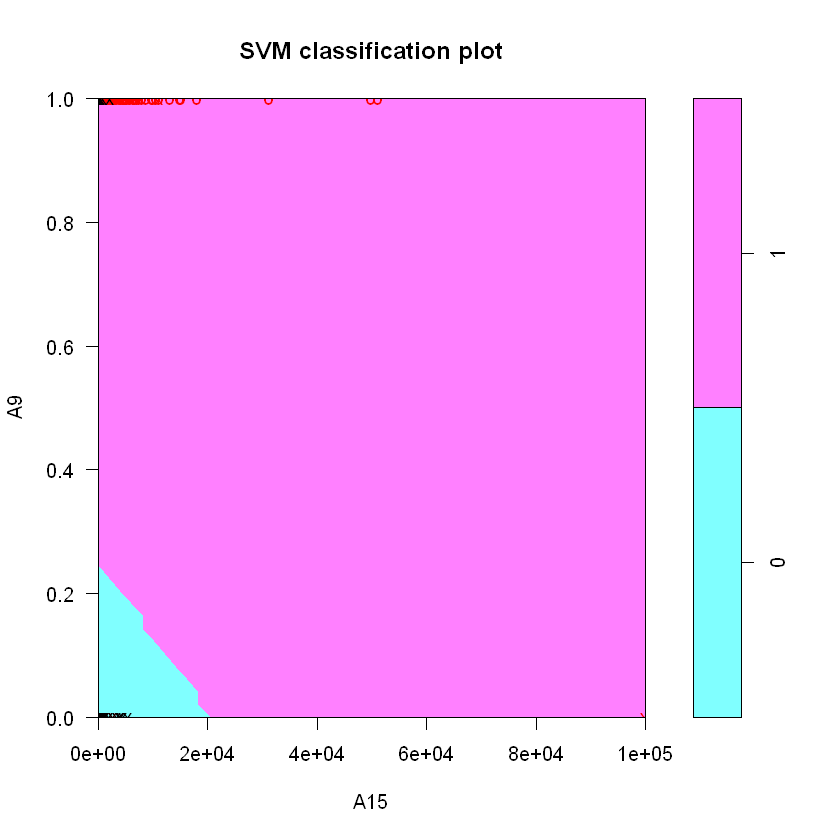

In [28]:

plot(svm_full, a9_a15_data)



In [29]:

1 - mean(p_fullmodel==a9_a15_data[,1]) # model error



[1] 0.1360856

### C = 100,000

In [30]:

svm_full=svm(Class ~ ., data=a9_a15_data, kernel="linear", cost=100000, scale=F, type="C-classification")



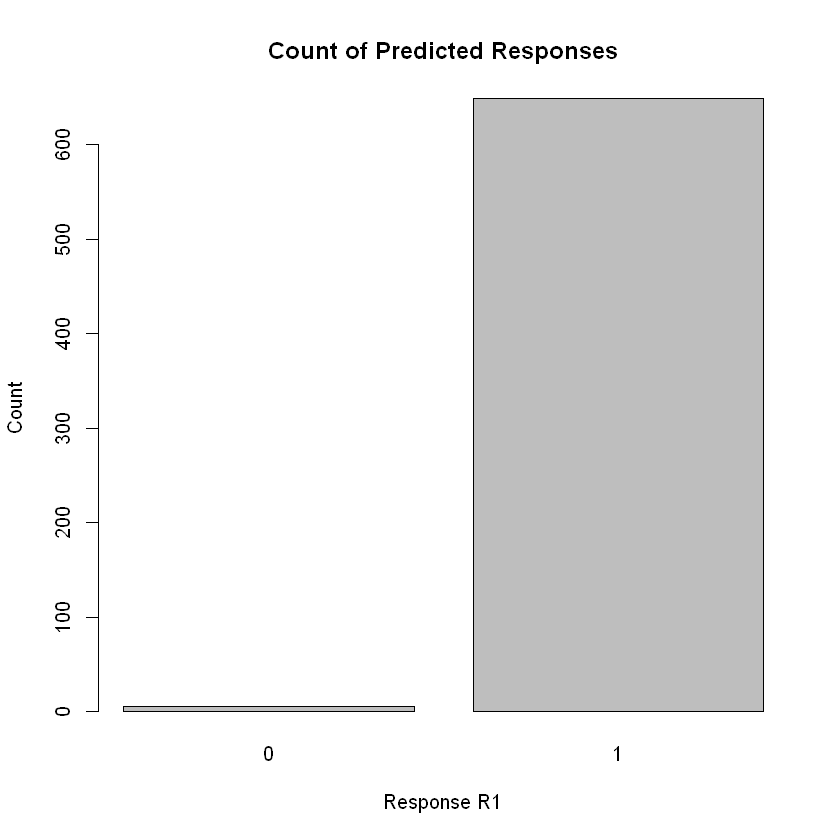

In [31]:

p_fullmodel=predict (svm_full, a9_a15_data, type="class") 
plot(p_fullmodel, main="Count of Predicted Responses", xlab="Response R1", ylab="Count")



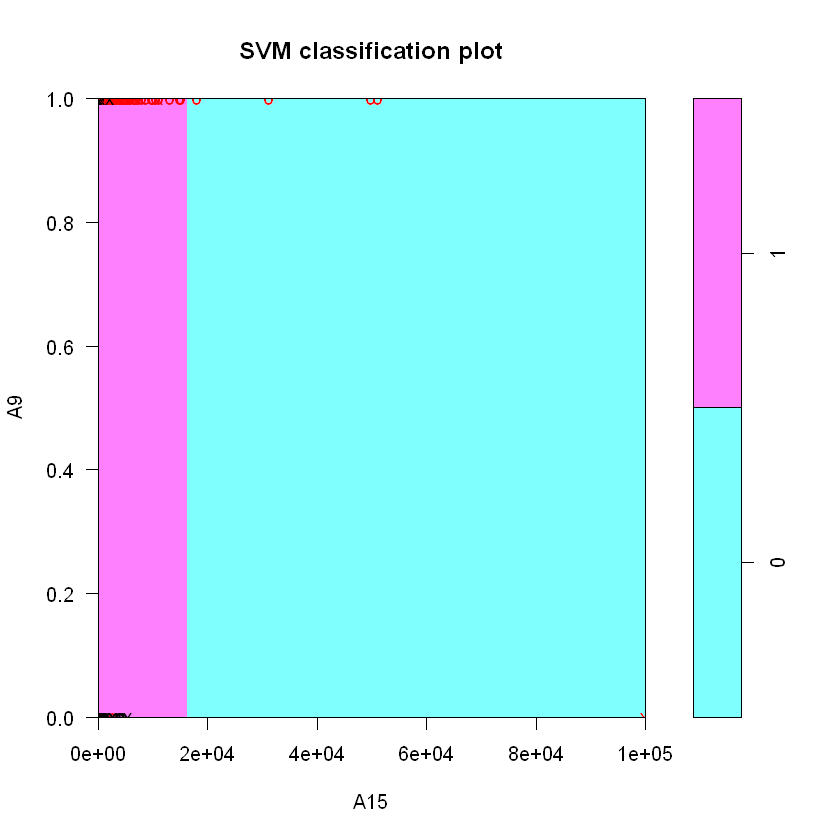

In [32]:

plot(svm_full, a9_a15_data)



In [33]:

1 - mean(p_fullmodel==a9_a15_data[,1]) # model error



[1] 0.5550459

### C = 100

In [34]:

svm_full=svm(Class ~ ., data=a9_a15_data, kernel="linear", cost=1, scale=F, type="C-classification")



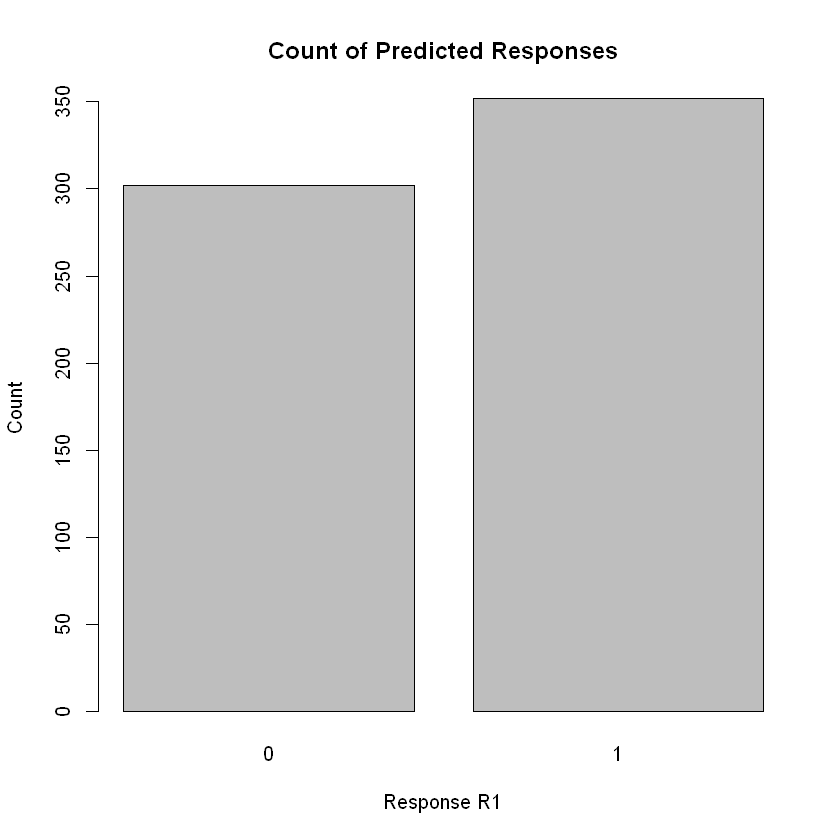

In [35]:

p_fullmodel=predict (svm_full, a9_a15_data, type="class") 
plot(p_fullmodel, main="Count of Predicted Responses", xlab="Response R1", ylab="Count")



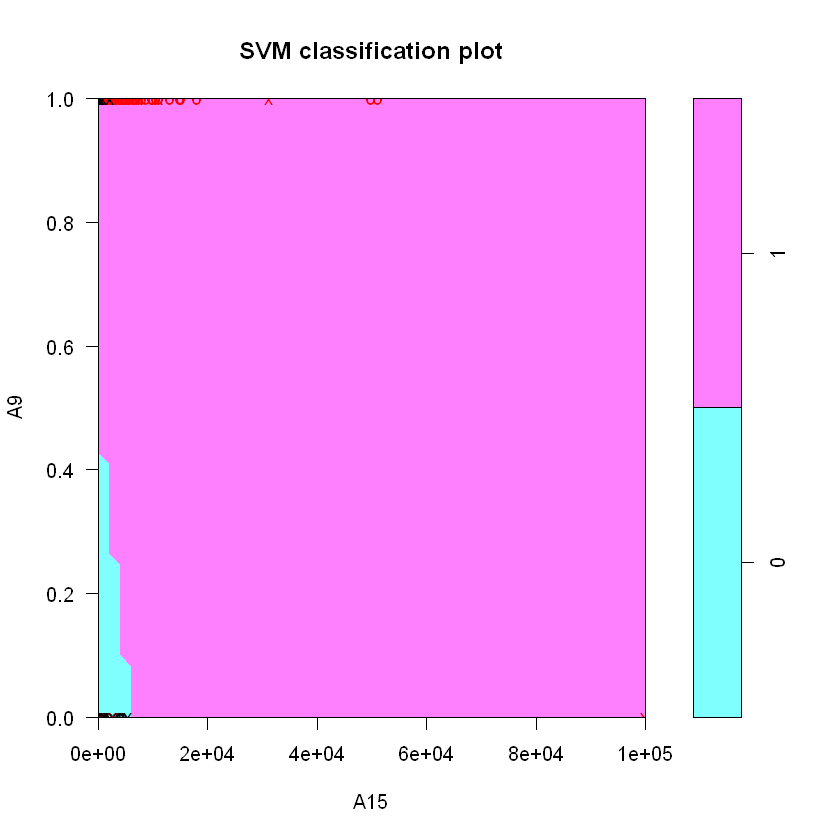

In [36]:

plot(svm_full, a9_a15_data)



In [37]:

1 - mean(p_fullmodel==a9_a15_data[,1]) # model error



[1] 0.1376147

As we can see from the 2D SVM plots presented above, our choice of C = lambda^-1 is important to how the classifier weights the cost of misclassification. Higher values of C (corresponding to lower values of lambda) weigh the cost of misclassification higher than lower values of C. At the extreme case of C = 100,000 the otherwise soft classifier turns into a hard classifier (to avoid the cost of misclassification). As C goes towards 0, we see the cost for misclassification is less than higher values of C, so a softer classifier is observed. See excellent discussion below:

https://datascience.stackexchange.com/a/4945


<h2 id="Try-different-values-of-C">Try different values of C<a class="anchor-link" href="#Try-different-values-of-C">¶</a></h2><ul>
<li>first we must generate some different values of C in an R vector object<ul>
<li>lets try C from 1e-04 to 1e+09 to get an idea of the range we should be trying for C</li>
</ul>
</li>
<li>model error results will be stored in an R vector object</li>
</ul>



<p><strong><em> I learned the hard way that appending values to an array in R is super slow - a better method is provided in part 3 </em></strong></p>


In [38]:

# init different values for c vector

different_values_for_C <- c(0.0001,0.001,0.01,0.1,1,10,100,1000,10000,100000,1000000,10000000,100000000,1000000000)
different_values_for_C



[1] 1e-04 1e-03 1e-02 1e-01 1e+00 1e+01 1e+02 1e+03 1e+04 1e+05 1e+06 1e+07
[13] 1e+08 1e+09

In [39]:

# init model error vector with 0's
# reference https://stackoverflow.com/a/33119483

different_values_for_C_model_errors <- c(0)
different_values_for_C_model_errors



[1] 0


<h3 id="Run-Support-vector-machine-|-Linear-kernel-|-C-=-C-for-C-in-different_values_for_C">Run Support vector machine | Linear kernel | C = C for C in different_values_for_C<a class="anchor-link" href="#Run-Support-vector-machine-|-Linear-kernel-|-C-=-C-for-C-in-different_values_for_C">¶</a></h3><ul>
<li>lets update our different_values_for_C_model_errors vector each time with SVM model C's calculated error</li>
</ul>


In [40]:

for(C in different_values_for_C){
    svm_model_linear <- ksvm(as.matrix(data[,1:10]),as.factor(data[,11]), type= "C-svc", kernel="vanilladot", C=C, scaled=TRUE)
    different_values_for_C_model_errors <- c(different_values_for_C_model_errors, error(svm_model_linear))
    
}



 Setting default kernel parameters  
 Setting default kernel parameters  
 Setting default kernel parameters  
 Setting default kernel parameters  
 Setting default kernel parameters  
 Setting default kernel parameters  
 Setting default kernel parameters  
 Setting default kernel parameters  
 Setting default kernel parameters  
 Setting default kernel parameters  
 Setting default kernel parameters  
 Setting default kernel parameters  
 Setting default kernel parameters  
 Setting default kernel parameters  



<h3 id="Lets-plot-our-error-vector">Lets plot our error vector<a class="anchor-link" href="#Lets-plot-our-error-vector">¶</a></h3><p>reference:</p>
<ul>
<li><a href="https://www.statmethods.net/advgraphs/axes.html">https://www.statmethods.net/advgraphs/axes.html</a></li>
<li><a href="https://cran.r-project.org/web/packages/cowplot/vignettes/introduction.html">https://cran.r-project.org/web/packages/cowplot/vignettes/introduction.html</a></li>
<li><a href="https://stackoverflow.com/a/12554427">https://stackoverflow.com/a/12554427</a></li>
</ul>


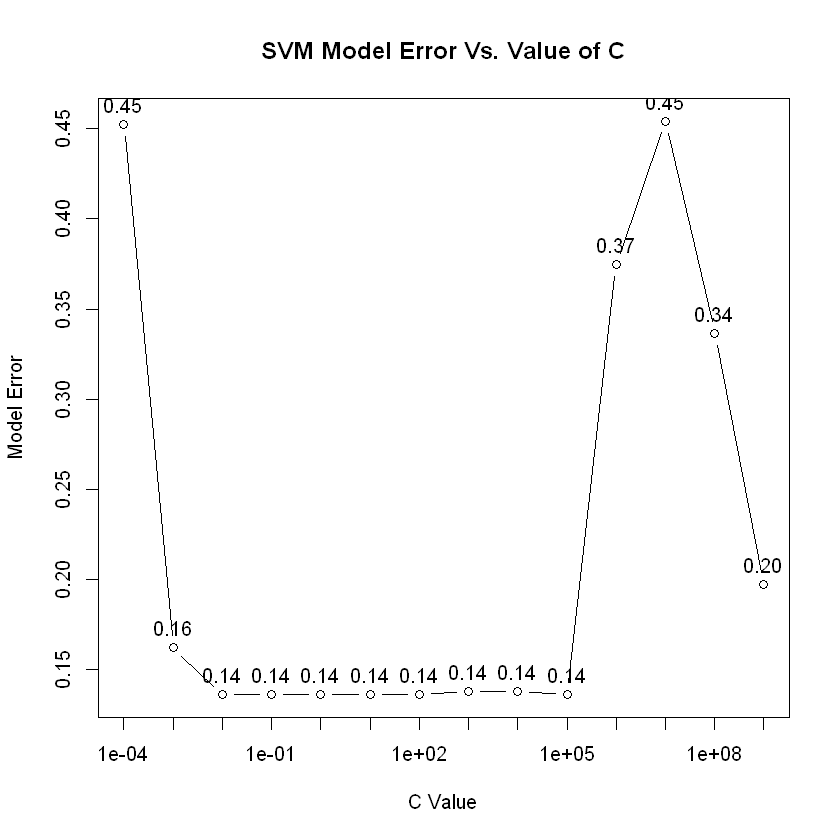

In [41]:

plot(different_values_for_C, different_values_for_C_model_errors[-1], type='b', log = "x", main="SVM Model Error Vs. Value of C", xlab="C Value", ylab="Model Error")
axis(1, at=different_values_for_C, labels=F)
text(different_values_for_C, different_values_for_C_model_errors[-1], labels=format(round(different_values_for_C_model_errors[-1], 2), nsmall = 2), pos=3)




<h3 id="And-the-optimal-value-of-C-are....">And the optimal value of C are....<a class="anchor-link" href="#And-the-optimal-value-of-C-are....">¶</a></h3>


In [42]:

# reference https://www.rdocumentation.org/packages/maSigPro/versions/1.44.0/topics/position

optimal_values_for_c <- different_values_for_C[which(different_values_for_C_model_errors[-1] == min(different_values_for_C_model_errors[-1]))]
optimal_values_for_c



[1] 1e-02 1e-01 1e+00 1e+01 1e+02 1e+05


<h3 id="With-error-rate...">With error rate...<a class="anchor-link" href="#With-error-rate...">¶</a></h3>


In [43]:

min(different_values_for_C_model_errors[-1])



[1] 0.1360856


<h3 id="And-accuracy">And accuracy<a class="anchor-link" href="#And-accuracy">¶</a></h3>


In [44]:

1 - min(different_values_for_C_model_errors[-1])



[1] 0.8639144


<h3 id="All-error-rates">All error rates<a class="anchor-link" href="#All-error-rates">¶</a></h3>


In [45]:

different_values_for_C_model_errors[-1]



[1] 0.4525994 0.1620795 0.1360856 0.1360856 0.1360856 0.1360856 0.1360856
 [8] 0.1376147 0.1376147 0.1360856 0.3746177 0.4541284 0.3363914 0.1972477

## Lets look at the edge cases C = 0.0001 and C = 1e+07


<h3 id="Support-vector-machine-|-Linear-kernel-|-C=0.0001-analysis">Support vector machine | Linear kernel | C=0.0001 analysis<a class="anchor-link" href="#Support-vector-machine-|-Linear-kernel-|-C=100-analysis">¶</a></h3><p>The svm_model with a linear kernel and c=0.0001 performs poorly and only makes predictions of all 0's</p>
<p>Important features (in descending order):</p>
<ul>
<li>A9</li>
<li>A8</li>
<li>A15</li>
</ul>
<p>Model intercept:</p>
<ul>
<li>-0.90</li>
</ul>
<p>Error:</p>
<ul>
<li>0.4525</li>
</ul>
<p>% predictions correct:</p>
<ul>
<li>0.5474</li>
</ul>


In [46]:

svm_model_linear = ksvm(as.matrix(data[,1:10]),as.factor(data[,11]), type= "C-svc", kernel="vanilladot", C=1e-04, scaled=TRUE)
svm_model_linear



 Setting default kernel parameters  


Support Vector Machine object of class "ksvm" 

SV type: C-svc  (classification) 
 parameter : cost C = 1e-04 

Linear (vanilla) kernel function. 

Number of Support Vectors : 593 

Objective Function Value : -0.0575 
Training error : 0.452599 


<h3 id="Calculate-model-coefficients">Calculate model coefficients<a class="anchor-link" href="#Calculate-model-coefficients">¶</a></h3><ul>
<li>in order to calculate our models' coefficients we must first take the colSum of the different features<ul>
<li>svm_model features are accessible by the @ operator<ul>
<li>we want the product of the xmatrix and the coefs</li>
</ul>
</li>
</ul>
</li>
</ul>


In [47]:

# checking the head of the xmatrix

head(svm_model_linear@xmatrix[[1]])



,A1,A2,A3,A8,A9,A10,A11,A12,A14,A15
1,0.6703899,-0.06245717,-0.96163135,-0.29434003,0.931259,-1.1299515,-0.3017670,0.9255499,0.1302071,-0.19292609
2,-1.4893884,2.26106895,-0.07376793,0.23694380,0.931259,-1.1299515,0.7051495,0.9255499,-0.8144462,-0.08624561
3,-1.4893884,-0.59075890,-0.86209509,-0.22013838,0.931259,0.8836405,-0.5031503,0.9255499,0.5936219,-0.03595339
4,0.6703899,-0.31283714,-0.65505968,0.44767650,0.931259,-1.1299515,0.5037662,-1.0787867,-0.4757969,-0.19235458
5,0.6703899,-0.95214066,0.15815155,-0.15780899,0.931259,0.8836405,-0.5031503,0.9255499,-0.3569726,-0.19292609
6,0.6703899,0.04186782,-0.16534129,0.07666823,0.931259,0.8836405,-0.5031503,-1.0787867,1.0689192,-0.19292609


In [48]:

# checking the head of the coef values vector

head(svm_model_linear@coef[[1]])



[1] 1e-04 1e-04 1e-04 1e-04 1e-04 1e-04

In [49]:

a1_am <- colSums(svm_model_linear@xmatrix[[1]] * svm_model_linear@coef[[1]])
a1_am



A1            A2            A3            A8            A9 
-0.0004319557  0.0065415940  0.0087400797  0.0179762408  0.0412707034 
          A10           A11           A12           A14           A15 
-0.0239617452  0.0233201856 -0.0008017346 -0.0044802708  0.0102239706

### Model Equation

In [50]:
a1_am <- colSums(svm_model_linear@xmatrix[[1]] * svm_model_linear@coef[[1]])
a0 <- svm_model_linear@b

for (i in 1:nrow(as.data.frame(a1_am))) {
    cat(format(round(a1_am[i], 5), nsmall = 3))
    cat( )
    cat(rownames(as.data.frame(a1_am))[i])
    cat(' + ')
  }
cat(-a0)

-0.00043A1 + 0.00654A2 + 0.00874A3 + 0.01798A8 + 0.04127A9 + -0.02396A10 + 0.02332A11 + -8e-04A12 + -0.00448A14 + 0.01022A15 + -0.9021255

In [51]:

# sorted in descending order
# references: http://sites.stat.psu.edu/~drh20/R/html/base/html/sort.html

sort(a1_am, decreasing=TRUE)



A9           A11            A8           A15            A3 
 0.0412707034  0.0233201856  0.0179762408  0.0102239706  0.0087400797 
           A2            A1           A12           A14           A10 
 0.0065415940 -0.0004319557 -0.0008017346 -0.0044802708 -0.0239617452


<h3 id="Calculate-model-intercept">Calculate model intercept<a class="anchor-link" href="#Calculate-model-intercept">¶</a></h3><ul>
<li>to access our models' intercept, we must access the "b" property of the svm_model</li>
</ul>


In [52]:

a0 <- svm_model_linear@b
a0



[1] 0.9021255


<h3 id="Make-predictions-using-model">Make predictions using model<a class="anchor-link" href="#Make-predictions-using-model">¶</a></h3><ul>
<li>to make predictions using our model we must use the predict method on the svm_model<ul>
<li>returns an R vector object [0,1]</li>
</ul>
</li>
</ul>


In [53]:

svm_model_linear_predictions <- predict(svm_model_linear,data[,1:10])
svm_model_linear_predictions



[1] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [38] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [75] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[112] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[149] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[186] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[223] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[260] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[297] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[334] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[371] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[408] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[445] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[482] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[519] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[556] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[593] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[630] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
Levels: 0 1

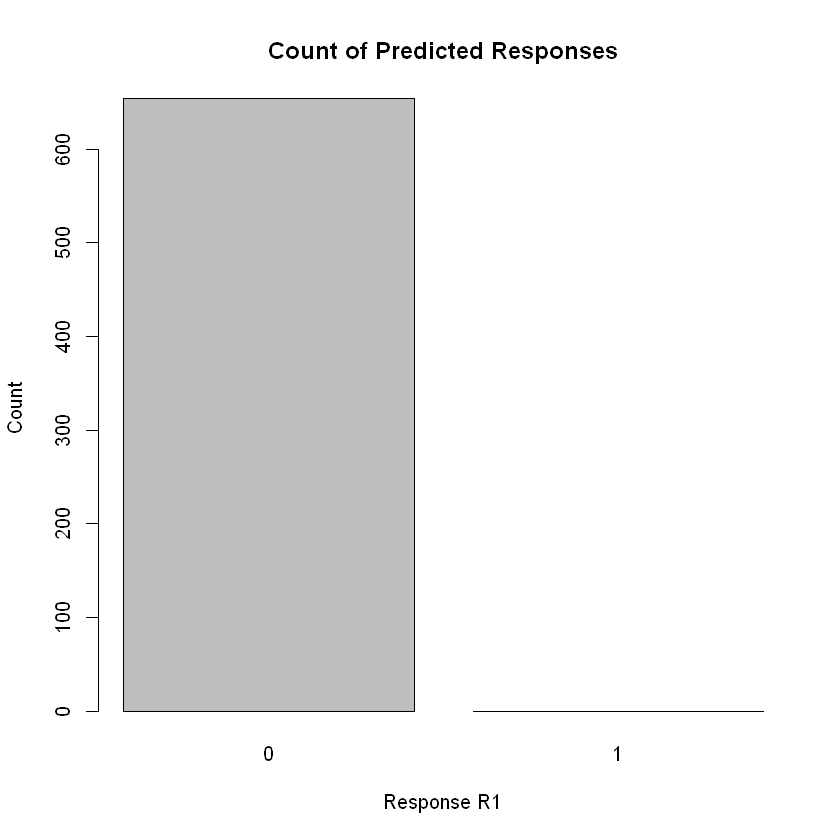

In [54]:

# reference https://www.statmethods.net/advgraphs/axes.html

plot(svm_model_linear_predictions, main="Count of Predicted Responses", xlab="Response R1", ylab="Count")




<h3 id="Find-fraction-of-predictions-predicted-correctly">Find fraction of predictions predicted correctly<a class="anchor-link" href="#Find-fraction-of-predictions-predicted-correctly">¶</a></h3><ul>
<li>As denoted by the homework handout, we can use the procedure below to find the fraction of predictions predicted correctly by our model</li>
</ul>


In [55]:

svm_model_linear_predictions <- predict(svm_model_linear,data[,1:10])
percent_pred_correct <- sum(svm_model_linear_predictions == data[,11]) / nrow(data)
percent_pred_correct



[1] 0.5474006


<h3 id="Support-vector-machine-|-Linear-kernel-|-C=1e+07-analysis">Support vector machine | Linear kernel | C=1e+07 analysis<a class="anchor-link" href="#Support-vector-machine-|-Linear-kernel-|-C=1e+07-analysis">¶</a></h3><p>The svm_model with a linear kernel and C=1e+07 performs poorly and makes mixed predictions between 0 and 1.</p>
<p>Important features (in descending order):</p>
<ul>
<li>A14</li>
<li>A11</li>
<li>A9</li>
</ul>
<p>Model intercept:</p>
<ul>
<li>-0.63</li>
</ul>
<p>Error:</p>
<ul>
<li>0.4541</li>
</ul>
<p>% predictions correct:</p>
<ul>
<li>0.5459</li>
</ul>


In [56]:

svm_model_linear = ksvm(as.matrix(data[,1:10]),as.factor(data[,11]), type= "C-svc", kernel="vanilladot", C=1e+07, scaled=TRUE)
svm_model_linear



 Setting default kernel parameters  


Support Vector Machine object of class "ksvm" 

SV type: C-svc  (classification) 
 parameter : cost C = 1e+07 

Linear (vanilla) kernel function. 

Number of Support Vectors : 273 

Objective Function Value : -492032913 
Training error : 0.454128 


<h3 id="Calculate-model-coefficients">Calculate model coefficients<a class="anchor-link" href="#Calculate-model-coefficients">¶</a></h3><ul>
<li>in order to calculate our models' coefficients we must first take the colSum of the different features<ul>
<li>svm_model features are accessible by the @ operator<ul>
<li>we want the product of the xmatrix and the coefs</li>
</ul>
</li>
</ul>
</li>
</ul>


In [57]:

# checking the head of the xmatrix

head(svm_model_linear@xmatrix[[1]])



,A1,A2,A3,A8,A9,A10,A11,A12,A14,A15
1,0.6703899,-0.06245717,-0.9616313,-0.29434003,0.931259,-1.1299515,-0.3017670,0.9255499,0.1302071028,-0.19292609
3,-1.4893884,-0.59075890,-0.8620951,-0.22013838,0.931259,0.8836405,-0.5031503,0.9255499,0.5936219309,-0.03595339
6,0.6703899,0.04186782,-0.1653413,0.07666823,0.931259,0.8836405,-0.5031503,-1.0787867,1.0689191904,-0.19292609
9,0.6703899,1.90636399,-0.8620951,0.51000589,0.931259,0.8836405,-0.5031503,0.9255499,-0.0004996435,-0.13310882
11,0.6703899,-0.79273208,-0.7964012,-0.02276198,-1.072173,0.8836405,-0.5031503,-1.0787867,-0.3094428622,-0.19292609
13,-1.4893884,0.55681596,0.2328037,-0.36854168,0.931259,0.8836405,-0.5031503,-1.0787867,-1.0699184775,-0.19292609


In [58]:

# checking the head of the coef values vector

head(svm_model_linear@coef[[1]])



[1] 1.420344e+03 1.607847e+03 4.129407e+02 2.948879e+00 7.952893e+06
[6] 1.561291e+02

In [59]:

a1_am <- colSums(svm_model_linear@xmatrix[[1]] * svm_model_linear@coef[[1]])
a1_am



A1          A2          A3          A8          A9         A10 
 3.34118339  0.07116667  1.48713654 -1.91191610  1.81656497 -0.84078457 
        A11         A12         A14         A15 
 2.14068540  0.26667815 14.19089430  1.43377213

### Model Equation

In [60]:
a1_am <- colSums(svm_model_linear@xmatrix[[1]] * svm_model_linear@coef[[1]])
a0 <- svm_model_linear@b

for (i in 1:nrow(as.data.frame(a1_am))) {
    cat(format(round(a1_am[i], 5), nsmall = 3))
    cat( )
    cat(rownames(as.data.frame(a1_am))[i])
    cat(' + ')
  }
cat(-a0)

3.34118A1 + 0.07117A2 + 1.48714A3 + -1.91192A8 + 1.81656A9 + -0.84078A10 + 2.14069A11 + 0.26668A12 + 14.19089A14 + 1.43377A15 + -0.6277556

In [61]:

# sorted in descending order
# references: http://sites.stat.psu.edu/~drh20/R/html/base/html/sort.html

sort(a1_am, decreasing=TRUE)



A14          A1         A11          A9          A3         A15 
14.19089430  3.34118339  2.14068540  1.81656497  1.48713654  1.43377213 
        A12          A2         A10          A8 
 0.26667815  0.07116667 -0.84078457 -1.91191610


<h3 id="Calculate-model-intercept">Calculate model intercept<a class="anchor-link" href="#Calculate-model-intercept">¶</a></h3><ul>
<li>to access our models' intercept, we must access the "b" property of the svm_model</li>
</ul>


In [62]:

a0 <- svm_model_linear@b
a0



[1] 0.6277556


<h3 id="Make-predictions-using-model">Make predictions using model<a class="anchor-link" href="#Make-predictions-using-model">¶</a></h3><ul>
<li>to make predictions using our model we must use the predict method on the svm_model<ul>
<li>returns an R vector object [0,1]</li>
</ul>
</li>
</ul>


In [63]:

svm_model_linear_predictions <- predict(svm_model_linear,data[,1:10])
svm_model_linear_predictions



[1] 1 0 1 0 0 1 1 0 0 0 0 1 0 0 0 1 1 0 0 0 1 1 0 0 0 0 0 0 0 1 1 0 0 0 0 1 1
 [38] 1 1 0 0 0 1 0 0 0 1 1 0 0 1 1 1 1 0 1 0 1 1 0 1 1 0 0 0 1 0 1 0 1 1 1 1 0
 [75] 1 1 0 1 1 1 1 1 1 1 1 1 0 0 1 0 0 0 1 1 0 0 0 0 1 0 1 1 0 0 0 1 0 1 0 0 0
[112] 1 0 1 0 1 1 0 0 0 0 1 1 1 1 0 0 1 0 1 1 1 1 0 0 0 0 0 0 1 1 0 0 0 0 1 0 0
[149] 0 0 0 0 0 1 1 1 0 1 1 0 0 0 1 0 1 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 1 0
[186] 0 1 1 0 1 1 1 0 1 0 0 0 0 0 0 1 1 1 1 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1 0 0 0
[223] 0 0 1 1 1 0 1 0 0 0 1 0 1 0 0 1 0 0 1 0 1 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 1
[260] 0 1 0 0 1 0 0 1 1 1 1 0 0 0 0 1 1 0 1 0 1 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0
[297] 0 1 0 0 0 0 1 1 1 1 1 0 0 1 1 0 0 0 0 0 1 0 1 1 0 0 0 1 1 0 1 0 1 0 0 1 0
[334] 0 0 0 0 1 1 0 1 0 0 0 0 0 0 1 1 0 1 0 0 1 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0
[371] 1 0 1 1 1 0 0 0 0 0 0 1 0 1 0 0 1 0 1 0 0 1 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0
[408] 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 1 0 0 0 1 1 0 0 0 0
[445] 0 0 0 1 0 0 1 0 0 1 0 0 0 1 0 0 0 0 1 0 0 1 1 1 1 0 0 0 0 1 1 0 1 1 1 0 0
[482] 0 1 0 0 0 0 0 0 0 1 0 1 0 1 0 1 0 1 0 0 1 1 1 1 0 1 1 0 1 0 0 0 0 0 1 1 0
[519] 1 1 1 0 0 0 0 1 0 1 1 0 0 0 1 0 1 0 0 0 1 1 1 0 0 1 1 0 0 1 0 0 1 0 1 1 1
[556] 0 0 0 0 0 1 0 1 1 1 1 1 1 0 1 1 1 0 1 0 0 1 1 0 1 1 1 0 1 1 1 1 0 0 0 0 0
[593] 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 1 0 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0
[630] 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 1 1 1 0 0 1 0
Levels: 0 1

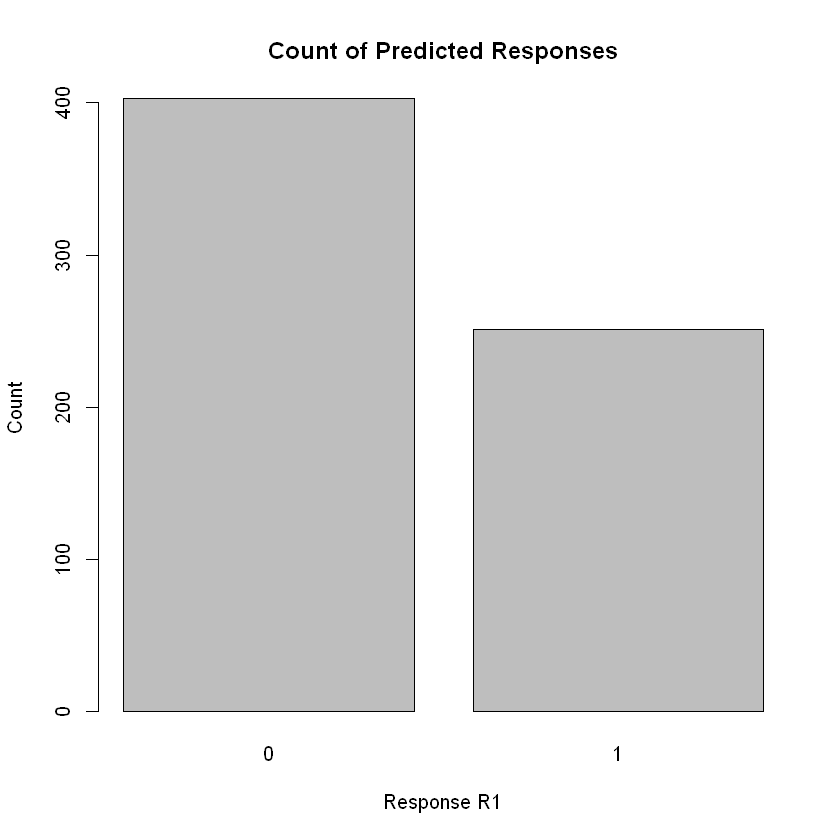

In [64]:

# reference https://www.statmethods.net/advgraphs/axes.html

plot(svm_model_linear_predictions, main="Count of Predicted Responses", xlab="Response R1", ylab="Count")




<h3 id="Find-fraction-of-predictions-predicted-correctly">Find fraction of predictions predicted correctly<a class="anchor-link" href="#Find-fraction-of-predictions-predicted-correctly">¶</a></h3><ul>
<li>As denoted by the homework handout, we can use the procedure below to find the fraction of predictions predicted correctly by our model</li>
</ul>


In [65]:

svm_model_linear_predictions <- predict(svm_model_linear,data[,1:10])
percent_pred_correct <- sum(svm_model_linear_predictions == data[,11]) / nrow(data)
percent_pred_correct



[1] 0.5458716

<p>Now that we've found the optimal value for C with a linear kernel, lets try some different kernels!</p>



<h3 id="Create-support-vector-machine-model">Create support vector machine model<a class="anchor-link" href="#Create-support-vector-machine-model">¶</a></h3><ul>
<li>svm documentation <a href="https://www.rdocumentation.org/packages/kernlab/versions/0.9-25/topics/ksvm">https://www.rdocumentation.org/packages/kernlab/versions/0.9-25/topics/ksvm</a></li>
</ul>
<p>"ksvm"(x, y = NULL, scaled = TRUE, type = NULL, kernel ="rbfdot", kpar = "automatic", C = .01, nu = 0.2, epsilon = 0.1, prob.model = FALSE, class.weights = NULL, cross = 0, fit = TRUE, cache = 40, tol = 0.001, shrinking = TRUE, ...,  subset, na.action = na.omit)</p>
<ul>
<li>kernel options:<ul>
<li>rbfdot: Radial Basis kernel "Gaussian"</li>
<li>polydot: Polynomial kernel</li>
<li>vanilladot: Linear kernel</li>
<li>tanhdot: Hyperbolic tangent kernel</li>
</ul>
</li>
</ul>
<p>Since our data is numeric and binary, we are limited to the kernel choices listed above</p>
<p>Lets try all kernels. For starters, we'll experiment with C = 0.01.</p>


In [66]:

different_kernels <- c("rbfdot", "polydot", "tanhdot", "vanilladot")



In [67]:

# init model error kernel vector with 0

different_values_for_model_errors_kernels <- c(0)




<h3 id="Run-Support-vector-machine-|-kernel-=-k-for-k-in-different_kernels-|-C-=-0.01">Run Support vector machine | kernel = k for k in different_kernels | C = 0.01<a class="anchor-link" href="#Run-Support-vector-machine-|-kernel-=-k-for-k-in-different_kernels-|-C-=-0.01">¶</a></h3><ul>
<li>lets update our different_values_for_C_model_errors_kernels vector each time with SVM model C's calculated error</li>
</ul>


In [68]:

# reference https://stackoverflow.com/a/33119483
for(k in different_kernels){
    svm_model_linear <- ksvm(as.matrix(data[,1:10]),as.factor(data[,11]), type= "C-svc", kernel=k, C=.01, scaled=TRUE)
    different_values_for_model_errors_kernels <- c(different_values_for_model_errors_kernels, error(svm_model_linear))
    
}



 Setting default kernel parameters  
 Setting default kernel parameters  
 Setting default kernel parameters  



<h3 id="Lets-plot-our-kernel-error-vector">Lets plot our kernel error vector<a class="anchor-link" href="#Lets-plot-our-kernel-error-vector">¶</a></h3><p>reference: <a href="https://www.statmethods.net/advgraphs/axes.html">https://www.statmethods.net/advgraphs/axes.html</a></p>


Warning message in xy.coords(x, y, recycle = TRUE, setLab = FALSE):
"NAs introduced by coercion"

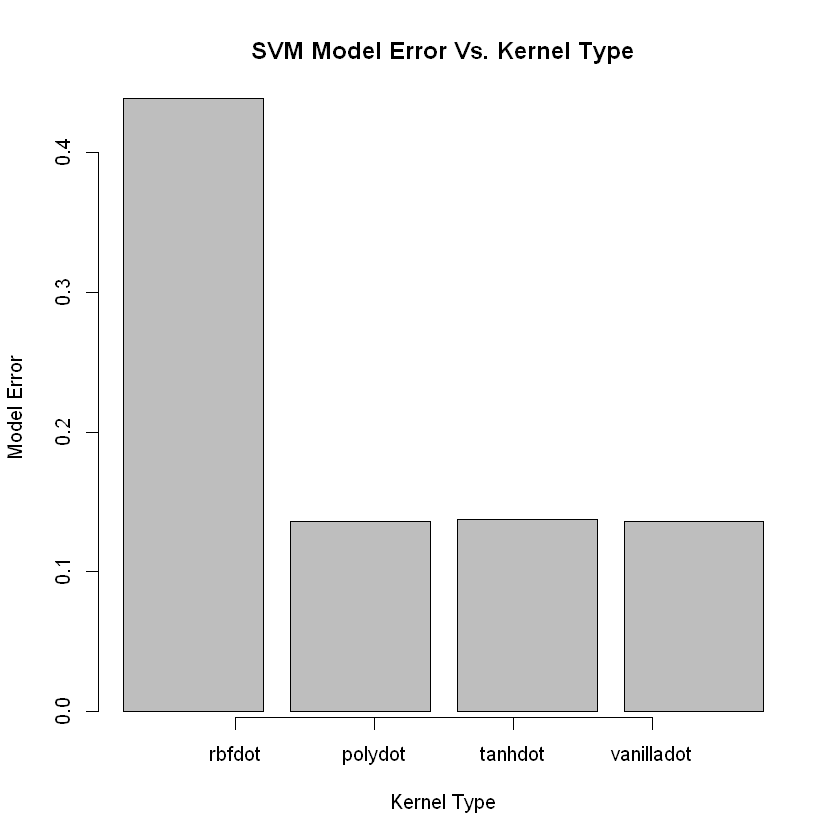

In [69]:

barplot(different_values_for_model_errors_kernels[-1], main="SVM Model Error Vs. Kernel Type", xlab="Kernel Type", ylab="Model Error")
axis(1,at=seq(1,4,1),labels=different_kernels)
text(different_kernels, different_values_for_model_errors_kernels[-1], labels=F)




<h3 id="And-the-optimal-kernels-are....">And the optimal kernels are....<a class="anchor-link" href="#And-the-optimal-kernels-are....">¶</a></h3>


In [70]:

different_kernels[which(different_values_for_model_errors_kernels[-1] == min(different_values_for_model_errors_kernels[-1]))]



[1] "polydot"    "vanilladot"


<h3 id="With-error-rate...">With error rate...<a class="anchor-link" href="#With-error-rate...">¶</a></h3>


In [71]:

min(different_values_for_model_errors_kernels[-1])



[1] 0.1360856


<h3 id="And-Accuracy">And Accuracy<a class="anchor-link" href="#And-Accuracy">¶</a></h3>


In [72]:

1-min(different_values_for_model_errors_kernels[-1])



[1] 0.8639144


<h3 id="Sanity-Check">Sanity Check<a class="anchor-link" href="#Sanity-Check">¶</a></h3><p>This makes sense as the polynomial kernel is more then likely using a higher dimension representation of the same attributes as the linear kernel, while the other two kernels (tanh, and rbfdot have their own set of assumptions).</p>



<h2 id="Lets-loop-through-C-values-and-different-kernels-to-try-to-find-the-optimal-SVM-model">Lets loop through C values and different kernels to try to find the optimal SVM model<a class="anchor-link" href="#Lets-loop-through-C-values-and-different-kernels-to-try-to-find-the-optimal-SVM-model">¶</a></h2>



<h3 id="Run-Support-vector-machine-|-kernel-=-k-for-k-in-different_kernels-|-C-=-C-for-C-in-optimal_values_for_c">Run Support vector machine | kernel = k for k in different_kernels | C = C for C in optimal_values_for_c<a class="anchor-link" href="#Run-Support-vector-machine-|-kernel-=-k-for-k-in-different_kernels-|-C-=-C-for-C-in-optimal_values_for_c">¶</a></h3><ul>
<li>lets update our different_values_for_C_model_errors_kernels vector each time with SVM model kernel k C's calculated error</li>
</ul>


In [73]:

different_kernels



[1] "rbfdot"     "polydot"    "tanhdot"    "vanilladot"

In [74]:

different_values_for_C



[1] 1e-04 1e-03 1e-02 1e-01 1e+00 1e+01 1e+02 1e+03 1e+04 1e+05 1e+06 1e+07
[13] 1e+08 1e+09


<p><strong><em> I learned the hard way that appending values to an array in R is super slow - a better method is provided in part 3 </em></strong></p>


In [75]:

# init model error, C, and kernel tracker vector with 0

different_values_for_C_model_errors_kernels <- c(0)
kernel_tracker <- c(0)
C_tracker <- c(0)



In [76]:

# reference https://stackoverflow.com/a/33119483
for(k in different_kernels){
    for(C in different_values_for_C){
        svm_model_linear <- ksvm(as.matrix(data[,1:10]),as.factor(data[,11]), type= "C-svc", kernel=k, C=C, scaled=TRUE)
        different_values_for_C_model_errors_kernels <- c(different_values_for_C_model_errors_kernels, error(svm_model_linear))
        kernel_tracker <- c(kernel_tracker,k)
        C_tracker <- c(C_tracker,C)
    }
}



 Setting default kernel parameters  
 Setting default kernel parameters  
 Setting default kernel parameters  
 Setting default kernel parameters  
 Setting default kernel parameters  
 Setting default kernel parameters  
 Setting default kernel parameters  
 Setting default kernel parameters  
 Setting default kernel parameters  
 Setting default kernel parameters  
 Setting default kernel parameters  
 Setting default kernel parameters  
 Setting default kernel parameters  
 Setting default kernel parameters  
 Setting default kernel parameters  
 Setting default kernel parameters  
 Setting default kernel parameters  
 Setting default kernel parameters  
 Setting default kernel parameters  
 Setting default kernel parameters  
 Setting default kernel parameters  
 Setting default kernel parameters  
 Setting default kernel parameters  
 Setting default kernel parameters  
 Setting default kernel parameters  
 Setting default kernel parameters  
 Setting default kernel parameters  
 

In [77]:

top_3_optimal_model_errors <- different_values_for_C_model_errors_kernels[-1][which(different_values_for_C_model_errors_kernels[-1] == sort(different_values_for_C_model_errors_kernels[-1], decreasing = T))]
top_3_optimal_model_errors



[1] 0.1376147 0.1360856 0.1360856

In [78]:

top_3_optimal_model_kernels <- kernel_tracker[-1][which(different_values_for_C_model_errors_kernels[-1] == sort(different_values_for_C_model_errors_kernels[-1], decreasing = T))]
top_3_optimal_model_kernels



[1] "tanhdot"    "vanilladot" "vanilladot"

In [79]:

top_3_optimal_model_Cs <- C_tracker[-1][which(different_values_for_C_model_errors_kernels[-1] == sort(different_values_for_C_model_errors_kernels[-1], decreasing = T))]
top_3_optimal_model_Cs



[1] 0.01 0.01 0.10


<h3 id="Lets-plot-our-model-error-vector">Lets plot our model error vector<a class="anchor-link" href="#Lets-plot-our-model-error-vector">¶</a></h3><p>reference:</p>
<ul>
<li><a href="https://www.statmethods.net/advgraphs/axes.html">https://www.statmethods.net/advgraphs/axes.html</a></li>
<li><a href="https://www.rdocumentation.org/packages/graphics/versions/3.4.3/topics/text">https://www.rdocumentation.org/packages/graphics/versions/3.4.3/topics/text</a></li>
</ul>


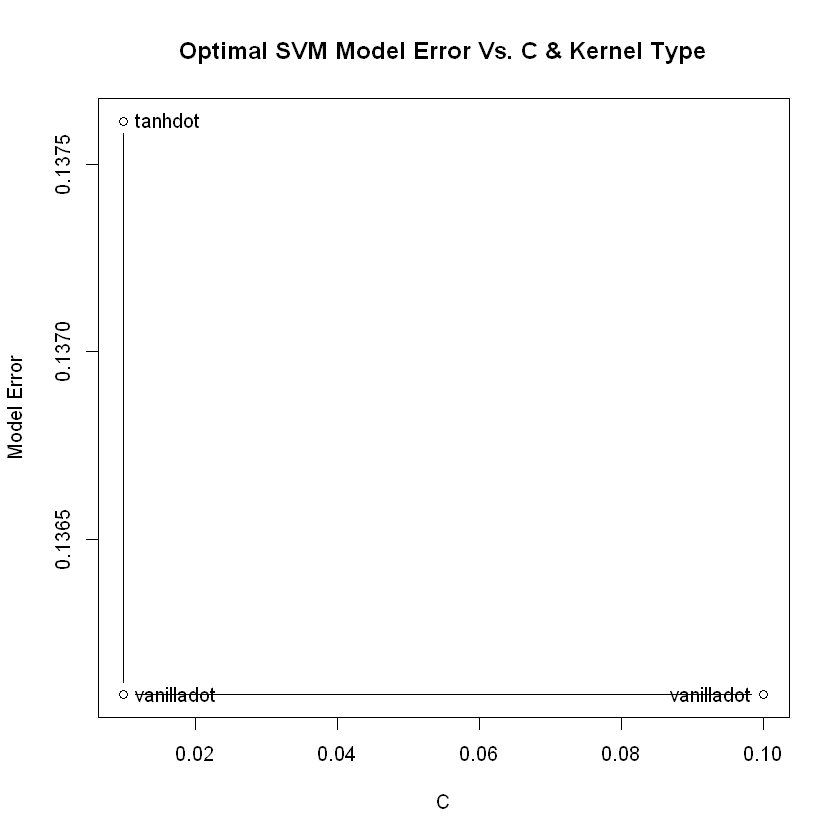

In [80]:

plot(top_3_optimal_model_Cs,top_3_optimal_model_errors, type='b', main="Optimal SVM Model Error Vs. C & Kernel Type", xlab="C", ylab="Model Error")
axis(1,labels = FALSE)
text(top_3_optimal_model_Cs,top_3_optimal_model_errors,labels=top_3_optimal_model_kernels, pos=c(4,4,2))




<h3 id="And-the-optimal-combination-is....">And the optimal combination is....<a class="anchor-link" href="#And-the-optimal-combination-is....">¶</a></h3>


In [81]:

# reference https://www.rdocumentation.org/packages/maSigPro/versions/1.44.0/topics/position

print(top_3_optimal_model_kernels[which(top_3_optimal_model_errors == min(top_3_optimal_model_errors))][1])
print(min(top_3_optimal_model_Cs))



[1] "vanilladot"
[1] 0.01



<h3 id="With-error-rate...">With error rate...<a class="anchor-link" href="#With-error-rate...">¶</a></h3>


In [82]:

min(top_3_optimal_model_errors)



[1] 0.1360856


<h3 id="Narrowed-C-down-to-band-between-0.01-and-0.1-Note-***">Narrowed C down to band between 0.01 and 0.1 Note *****</a></h3><ul>
<li>right back to square one where the error is equal across the board from 1e-02 to 1e+05 for linear kernel</li>
<li>why not try a loop (100 iterations) to try and discover the <em>absolute</em>
best measure.</li>
</ul>



<h2 id="Try-different-values-of-C">Try different values of C<a class="anchor-link" href="#Try-different-values-of-C">¶</a></h2><ul>
<li>first we must generate some different values of C in an R vector object<ul>
<li>lets try C from 0.01 to 0.1 to get an idea of the range we should be trying for C</li>
</ul>
</li>
<li>model error results will be stored in an R vector object</li>
</ul>


In [83]:

# init different values for c vector

different_values_for_C <- seq(.01,.1,.001)
length(different_values_for_C)



[1] 91

In [84]:

# init model error vector with 0's
# reference https://stackoverflow.com/a/33119483

different_values_for_C_linear_optimal_bandwidth_model_errors <- c(0)
different_values_for_C_linear_optimal_bandwidth_model_errors



[1] 0


<h3 id="Run-Support-vector-machine-|-Linear-kernel-|-C-=-C-for-C-in-different_values_for_C">Run Support vector machine | Linear kernel | C = C for C in different_values_for_C<a class="anchor-link" href="#Run-Support-vector-machine-|-Linear-kernel-|-C-=-C-for-C-in-different_values_for_C">¶</a></h3><ul>
<li>lets update our different_values_for_C_model_errors vector each time with SVM model C's calculated error</li>
</ul>


In [85]:

for(C in different_values_for_C){
    svm_model_linear <- ksvm(as.matrix(data[,1:10]),as.factor(data[,11]), type= "C-svc", kernel="vanilladot", C=C, scaled=TRUE)
    different_values_for_C_linear_optimal_bandwidth_model_errors <- c(different_values_for_C_linear_optimal_bandwidth_model_errors, error(svm_model_linear))
    
}



 Setting default kernel parameters  
 Setting default kernel parameters  
 Setting default kernel parameters  
 Setting default kernel parameters  
 Setting default kernel parameters  
 Setting default kernel parameters  
 Setting default kernel parameters  
 Setting default kernel parameters  
 Setting default kernel parameters  
 Setting default kernel parameters  
 Setting default kernel parameters  
 Setting default kernel parameters  
 Setting default kernel parameters  
 Setting default kernel parameters  
 Setting default kernel parameters  
 Setting default kernel parameters  
 Setting default kernel parameters  
 Setting default kernel parameters  
 Setting default kernel parameters  
 Setting default kernel parameters  
 Setting default kernel parameters  
 Setting default kernel parameters  
 Setting default kernel parameters  
 Setting default kernel parameters  
 Setting default kernel parameters  
 Setting default kernel parameters  
 Setting default kernel parameters  
 


<h3 id="Lets-plot-our-error-vector">Lets plot our error vector<a class="anchor-link" href="#Lets-plot-our-error-vector">¶</a></h3><p>reference:</p>
<ul>
<li><a href="https://www.statmethods.net/advgraphs/axes.html">https://www.statmethods.net/advgraphs/axes.html</a></li>
<li><a href="https://cran.r-project.org/web/packages/cowplot/vignettes/introduction.html">https://cran.r-project.org/web/packages/cowplot/vignettes/introduction.html</a></li>
<li><a href="https://stackoverflow.com/a/12554427">https://stackoverflow.com/a/12554427</a></li>
</ul>


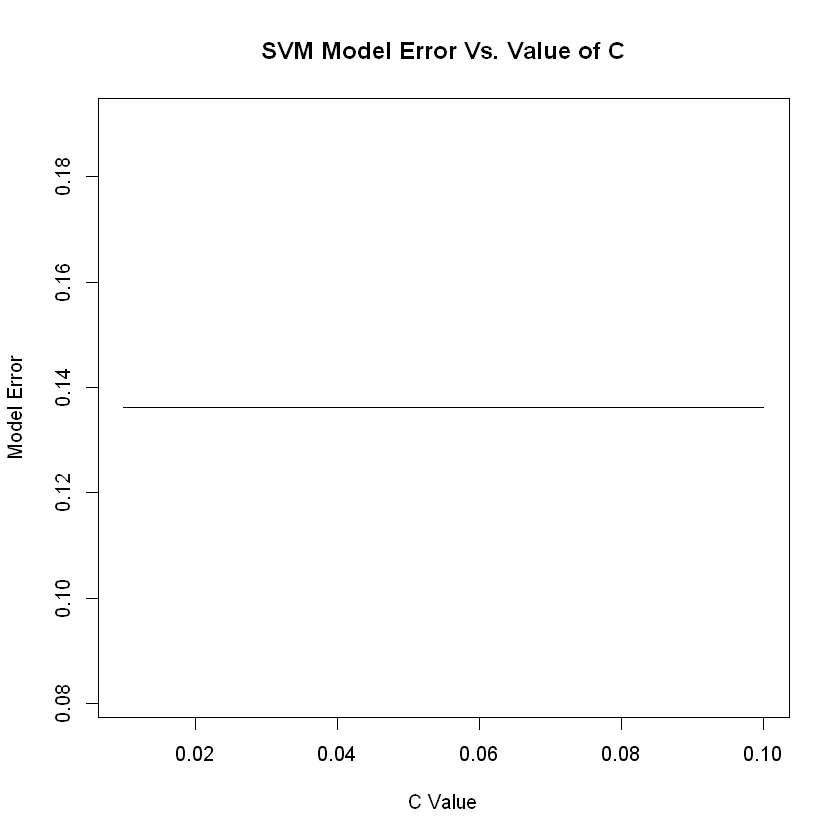

In [86]:

plot(different_values_for_C, different_values_for_C_linear_optimal_bandwidth_model_errors[-1], type='l', main="SVM Model Error Vs. Value of C", xlab="C Value", ylab="Model Error")
axis(1)




<h3 id="And-the-optimal-value-of-C-are....">And the optimal value of C are....<a class="anchor-link" href="#And-the-optimal-value-of-C-are....">¶</a></h3>


In [87]:

# reference https://www.rdocumentation.org/packages/maSigPro/versions/1.44.0/topics/position

optimal_values_for_c <- different_values_for_C[which(different_values_for_C_linear_optimal_bandwidth_model_errors[-1] == min(different_values_for_C_linear_optimal_bandwidth_model_errors[-1]))]
optimal_values_for_c



[1] 0.010 0.011 0.012 0.013 0.014 0.015 0.016 0.017 0.018 0.019 0.020 0.021
[13] 0.022 0.023 0.024 0.025 0.026 0.027 0.028 0.029 0.030 0.031 0.032 0.033
[25] 0.034 0.035 0.036 0.037 0.038 0.039 0.040 0.041 0.042 0.043 0.044 0.045
[37] 0.046 0.047 0.048 0.049 0.050 0.051 0.052 0.053 0.054 0.055 0.056 0.057
[49] 0.058 0.059 0.060 0.061 0.062 0.063 0.064 0.065 0.066 0.067 0.068 0.069
[61] 0.070 0.071 0.072 0.073 0.074 0.075 0.076 0.077 0.078 0.079 0.080 0.081
[73] 0.082 0.083 0.084 0.085 0.086 0.087 0.088 0.089 0.090 0.091 0.092 0.093
[85] 0.094 0.095 0.096 0.097 0.098 0.099 0.100


<h3 id="With-error-rate...">With error rate...<a class="anchor-link" href="#With-error-rate...">¶</a></h3>


In [88]:

min(different_values_for_C_linear_optimal_bandwidth_model_errors[-1])



[1] 0.1360856


<h3 id="Support-Vector-Machine-Model-Build-commentary">Support Vector Machine Model Build commentary<a class="anchor-link" href="#Support-Vector-Machine-Model-Build-commentary">¶</a></h3><p>The optimal model discovered by our parameter search ended up just being the first model we tested. This is advantageous because a linear kernel makes interpretation of the model much easier as the coeffiecients of the model can just be sorted in descending order to signify their importance (from greatest importance to least). In the case of the credit card dataset, attribute A9 and attribute A15 contributed the most to the binary response of [0,1]. It was shown that a very good model can be built from only using attributes A9 and A15. This hypothesis was confirmed by exhausting all kernel choices and iteratively searching fo the best value for the constant lambda denoted C. Different effects that values for C = lambda^-1 have on model output were also explored. After performing an exhaustive parameter search, our original model still came out on top. Since all models have the same accuracy (0.86) with C = 1e-02 to 1e+05, we can conclude that the groups in this dataset's response group R1 are easily distinguishable by a modest soft classifier..</p>



<p>Now let's build a k nearest neighbors model using the credit_card_data dataset!</p>


In [89]:

head(data)



A1,A2,A3,A8,A9,A10,A11,A12,A14,A15,R1
1,30.83,0.000,1.25,1,0,1,1,202,0,1
0,58.67,4.460,3.04,1,0,6,1,43,560,1
0,24.50,0.500,1.50,1,1,0,1,280,824,1
1,27.83,1.540,3.75,1,0,5,0,100,3,1
1,20.17,5.625,1.71,1,1,0,1,120,0,1
1,32.08,4.000,2.50,1,1,0,0,360,0,1



<h3 id="Init-model-error,-and-k_constant-tracker-with-0's-for-n-=-20">Init model error, and k_constant tracker with 0's for n = 20<a class="anchor-link" href="#Init-model-error,-and-k_constant-tracker-with-0's-for-n-=-20">¶</a></h3><p>Instead of appending to a vector like in part 2 I figured out its way speedier to allocate up front, then set values.</p>
<ul>
<li>rep(0,n) returns a zero vector of n length</li>
</ul>


In [90]:

k_constant_knn_model_accuracy_tracker <- rep(0,20)
k_constant_tracker <- rep(0,20)




<h3 id='Run-k-nearest-neighbor-|-k-[1,n=20]-with-input_attributes-a-[1,m=10]-and-kernel-set-to-default-"optimal"'>Run k nearest neighbor | k [1,n=20] with input_attributes a [1,m=10] and kernel set to default "optimal"<a class="anchor-link" href='#Run-k-nearest-neighbor-|-k-[1,n=20]-with-input_attributes-a-[1,m=10]-and-kernel-set-to-default-"optimal"'>¶</a></h3><ul>
<li>kknn reference: <a href="https://www.rdocumentation.org/packages/kknn/versions/1.3.1/topics/kknn">https://www.rdocumentation.org/packages/kknn/versions/1.3.1/topics/kknn</a></li>
<li>lets update our different_values_for_C_model_errors_kernels vector each time with knn model k = n and a = m's calculated error</li>
</ul>


In [91]:

for (n in 1:length(k_constant_tracker)){
    
    # init 0's vector for predictions
    knn_model_pred <- rep(0,(nrow(data)))
    
    for (i in 1:nrow(data)){

        # data[-i] removes row i of data when finding k nearest neighbors in training
        # else a perfect match between data point and itself would exist in test

        knn_model=kknn(R1~A1+A2+A3+A8+A9+A10+A11+A12+A14+A15,data[-i,],data[i,],k=n, scale = TRUE)

        knn_model_pred[i] <- as.integer(fitted(knn_model)+0.5)
      }
    knn_model_accuracy = sum(knn_model_pred == data[,11]) / nrow(data)
    
    # keep track of accuracy and values of k
    k_constant_knn_model_accuracy_tracker[n] = knn_model_accuracy
    k_constant_tracker[n] = n
}



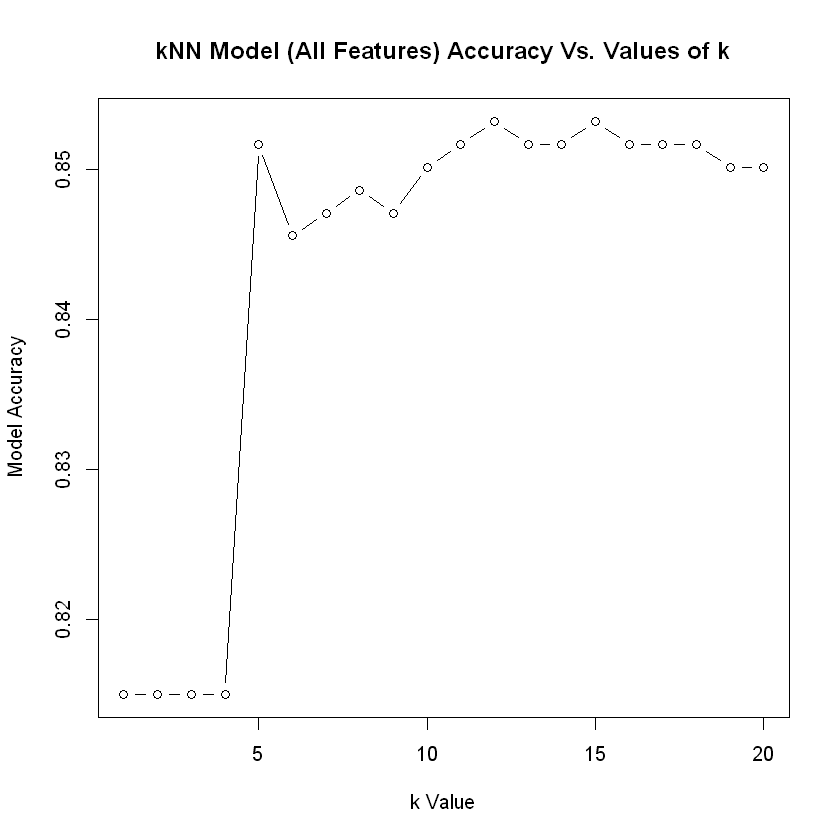

In [92]:

plot(k_constant_tracker, k_constant_knn_model_accuracy_tracker, type='b', main="kNN Model (All Features) Accuracy Vs. Values of k", xlab="k Value", ylab="Model Accuracy")
axis(1)




<p>Our graph denotes that k = 12 and k = 15 are the optimal values for this model. Let's confirm that below:</p>



<h3 id="Best-values-for-k">Best values for k<a class="anchor-link" href="#Best-values-for-k">¶</a></h3>


In [93]:

which(k_constant_knn_model_accuracy_tracker==max(k_constant_knn_model_accuracy_tracker))



[1] 12 15


<h3 id="Optimal-knn-model-fraction-of-correct-predictions">Optimal knn model fraction of correct predictions<a class="anchor-link" href="#Optimal-knn-model-fraction-of-correct-predictions">¶</a></h3>


In [94]:

max(k_constant_knn_model_accuracy_tracker)



[1] 0.853211


<h3 id="Optimal-knn-model-error-rate">Optimal knn model error rate<a class="anchor-link" href="#Optimal-knn-model-error-rate">¶</a></h3>


In [95]:

1 - max(k_constant_knn_model_accuracy_tracker)



[1] 0.146789


<h2 id="kNN-Model-with-Attributes-A9-and-A15">kNN Model with Attributes A9 and A15<a class="anchor-link" href="#kNN-Model-with-Attributes-A9-and-A15">¶</a></h2>



<h3 id="Init-model-error,-and-k_constant-tracker-with-0's-for-n-=-20">Init model error, and k_constant tracker with 0's for n = 20<a class="anchor-link" href="#Init-model-error,-and-k_constant-tracker-with-0's-for-n-=-20">¶</a></h3><p>Instead of appending to a vector like in part 2 I figured out its way speedier to allocate up front, then set values.</p>
<ul>
<li>rep(0,n) returns a zero vector of n length</li>
</ul>


In [96]:

vip_features_only_knn_model_accuracy_tracker <- rep(0,20)
vip_features_only_constant_knn_model_tracker <- rep(0,20)




<h3 id='Run-k-nearest-neighbor-|-k-[1,n=20]-with-input_attributes-a-[1,m=2]-and-kernel-set-to-default-"optimal"'>Run k nearest neighbor | k [1,n=20] with input_attributes a [1,m=2] and kernel set to default "optimal"<a class="anchor-link" href='#Run-k-nearest-neighbor-|-k-[1,n=20]-with-input_attributes-a-[1,m=2]-and-kernel-set-to-default-"optimal"'>¶</a></h3><ul>
<li>kknn reference: <a href="https://www.rdocumentation.org/packages/kknn/versions/1.3.1/topics/kknn">https://www.rdocumentation.org/packages/kknn/versions/1.3.1/topics/kknn</a></li>
<li>lets update our different_values_for_C_model_errors_kernels vector each time with knn model k = n and a = m's calculated error</li>
</ul>


In [97]:

for (n in 1:length(vip_features_only_constant_knn_model_tracker)){
    
    # init 0's vector for predictions
    knn_model_pred <- rep(0,(nrow(data)))
    
    for (i in 1:nrow(data)){

        # data[-i] removes row i of data when finding k nearest neighbors in training
        # else a perfect match between data point and itself would exist in test

        knn_model=kknn(R1~A9+A15,data[-i,],data[i,],k=n, scale = TRUE)

        knn_model_pred[i] <- as.integer(fitted(knn_model)+0.5)
      }
    knn_model_accuracy = sum(knn_model_pred == data[,11]) / nrow(data)
    
    # keep track of accuracy and values of k
    vip_features_only_knn_model_accuracy_tracker[n] = knn_model_accuracy
    vip_features_only_constant_knn_model_tracker[n] = n
}



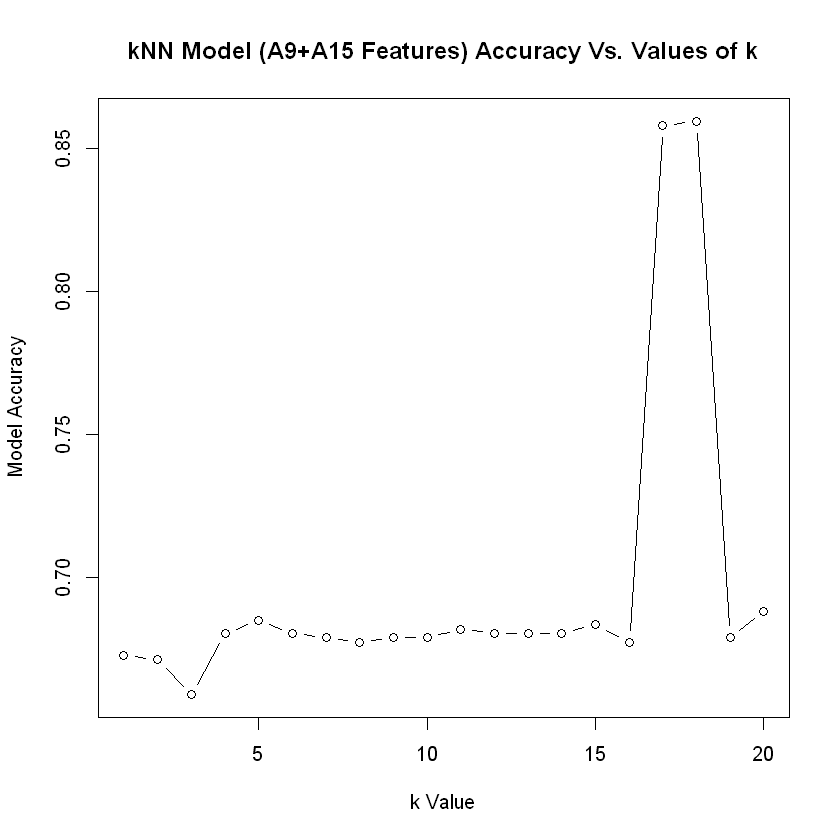

In [98]:

plot(vip_features_only_constant_knn_model_tracker, vip_features_only_knn_model_accuracy_tracker, type='b', main="kNN Model (A9+A15 Features) Accuracy Vs. Values of k", xlab="k Value", ylab="Model Accuracy")
axis(1)




<p>Our graph denotes that k = 18 is the optimal value for this model. Let's confirm that below:</p>



<h3 id="Best-values-for-k">Best values for k<a class="anchor-link" href="#Best-values-for-k">¶</a></h3>


In [99]:

which(vip_features_only_knn_model_accuracy_tracker==max(vip_features_only_knn_model_accuracy_tracker))



[1] 18


<h3 id="Optimal-knn-model-fraction-of-correct-predictions">Optimal knn model fraction of correct predictions<a class="anchor-link" href="#Optimal-knn-model-fraction-of-correct-predictions">¶</a></h3>


In [100]:

max(vip_features_only_knn_model_accuracy_tracker)



[1] 0.8593272


<h3 id="Optimal-knn-model-error-rate">Optimal knn model error rate<a class="anchor-link" href="#Optimal-knn-model-error-rate">¶</a></h3>


In [101]:

1 - max(vip_features_only_knn_model_accuracy_tracker)



[1] 0.1406728


<h3 id="Difference-model-accuracy-between-knn-model-(A9+A15)-and-knn-model-(All)">Difference model accuracy between knn model (A9+A15) and knn model (All)<a class="anchor-link" href="#Difference-model-accuracy-between-knn-model-(A9+A15)-and-knn-model-(All)">¶</a></h3>


In [102]:

max(vip_features_only_knn_model_accuracy_tracker) - max(k_constant_knn_model_accuracy_tracker)



[1] 0.006116208


<h2 id="kNN-Model-with-Attributes-A9-and-A15-and-different-kernels">kNN Model with Attributes A9 and A15 and different kernels<a class="anchor-link" href="#kNN-Model-with-Attributes-A9-and-A15-and-different-kernels">¶</a></h2>



<h3 id="Init-model-error,-and-kernel-tracker-with-0's-for-k-=-18,-kernel-kn-=-q">Init model error, and kernel tracker with 0's for k = 18, kernel kn = q<a class="anchor-link" href="#Init-model-error,-and-kernel-tracker-with-0's-for-k-=-18,-kernel-kn-=-q">¶</a></h3><p>Instead of appending to a vector like in part 2 I figured out its way speedier to allocate up front, then set values.</p>
<ul>
<li>rep(0,n) returns a zero vector of n length</li>
</ul>


In [103]:

different_kernels <- c('rectangular', 'triangular', 'epanechnikov', 'biweight', 'triweight', 'cos', 'inv', 'gaussian', 'rank')
plot_position <- c(4,4,4,4,4,4,4,4,2)
vip_features_only_knn_model_accuracy_tracker <- rep(0,length(different_kernels))
vip_features_only_kernel_knn_model_tracker <- rep(0,length(different_kernels))




<h3 id="Run-k-nearest-neighbor-|-k-=-18-with-input_attributes-a-[1,m=2]-and-kernel-set-to-q-for-q-in-vip_features_only_kernel_knn_model_tracker">Run k nearest neighbor | k = 18 with input_attributes a [1,m=2] and kernel set to q for q in vip_features_only_kernel_knn_model_tracker<a class="anchor-link" href="#Run-k-nearest-neighbor-|-k-=-18-with-input_attributes-a-[1,m=2]-and-kernel-set-to-q-for-q-in-vip_features_only_kernel_knn_model_tracker">¶</a></h3><ul>
<li>kknn reference: <a href="https://www.rdocumentation.org/packages/kknn/versions/1.3.1/topics/kknn">https://www.rdocumentation.org/packages/kknn/versions/1.3.1/topics/kknn</a></li>
<li>lets update our different_values_for_C_model_errors_kernels vector each time with knn model k = n and a = m's calculated error</li>
</ul>


In [104]:

for (q in 1:length(different_kernels)){
    
    # init 0's vector for predictions
    knn_model_pred <- rep(0,(nrow(data)))
    
    for (i in 1:nrow(data)){

        # data[-i] removes row i of data when finding k nearest neighbors in training
        # else a perfect match between data point and itself would exist in test

        knn_model=kknn(R1~A9+A15,data[-i,],data[i,],k=18, scale = TRUE, kernel=different_kernels[q])

        knn_model_pred[i] <- as.integer(fitted(knn_model)+0.5)
      }
    knn_model_accuracy = sum(knn_model_pred == data[,11]) / nrow(data)
    
    # keep track of accuracy and values of k
    vip_features_only_knn_model_accuracy_tracker[q] = knn_model_accuracy
    vip_features_only_kernel_knn_model_tracker[q] = different_kernels[q]
}



In [105]:

vip_features_only_knn_model_accuracy_tracker



[1] 0.8639144 0.8623853 0.8623853 0.8608563 0.8577982 0.8623853 0.8577982
[8] 0.8608563 0.8639144

In [106]:

vip_features_only_kernel_knn_model_tracker



[1] "rectangular"  "triangular"   "epanechnikov" "biweight"     "triweight"   
[6] "cos"          "inv"          "gaussian"     "rank"

Warning message in text.default(x = seq(1, length(vip_features_only_knn_model_accuracy_tracker)), :
""at" is not a graphical parameter"

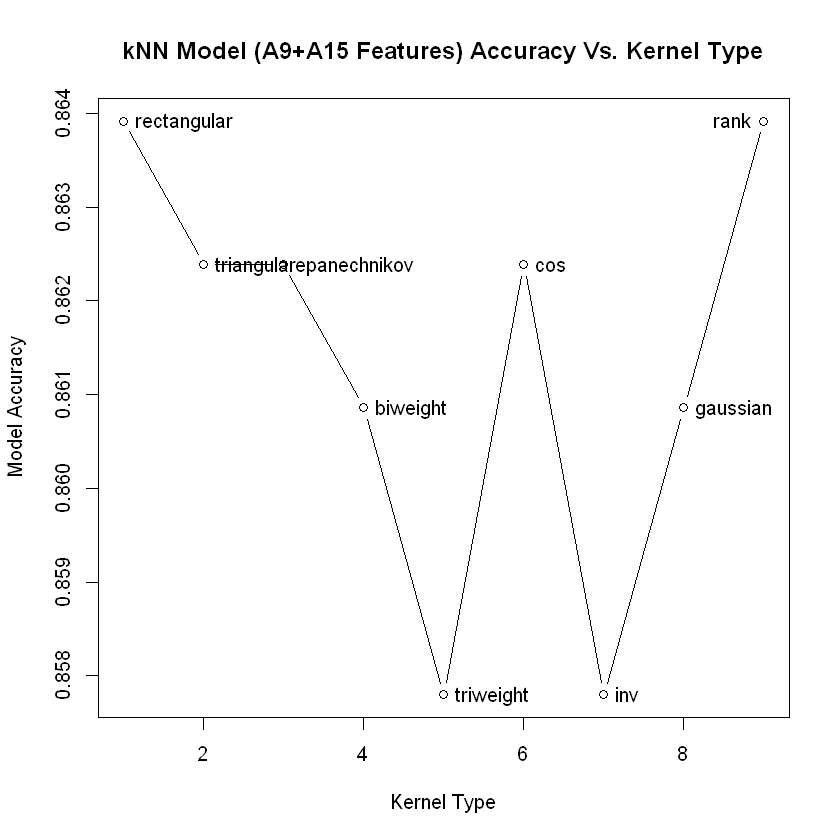

In [107]:

plot(vip_features_only_knn_model_accuracy_tracker, type='b' ,main="kNN Model (A9+A15 Features) Accuracy Vs. Kernel Type", xlab="Kernel Type", ylab="Model Accuracy")
text(x=seq(1,length(vip_features_only_knn_model_accuracy_tracker)),vip_features_only_knn_model_accuracy_tracker,at=vip_features_only_knn_model_accuracy_tracker,labels=vip_features_only_kernel_knn_model_tracker, pos=plot_position)




<p>Our graph denotes that a tie exists between the rectangular and the rank kernels for the optimal value for this model. Let's confirm that below:</p>



<h3 id="Best-kernels-in-terms-of-model-accuracy">Best kernels in terms of model accuracy<a class="anchor-link" href="#Best-kernels-in-terms-of-model-accuracy">¶</a></h3>


In [108]:

vip_features_only_kernel_knn_model_tracker[which(vip_features_only_knn_model_accuracy_tracker==max(vip_features_only_knn_model_accuracy_tracker))]



[1] "rectangular" "rank"


<h3 id="Optimal-knn-model-fraction-of-correct-predictions">Optimal knn model fraction of correct predictions<a class="anchor-link" href="#Optimal-knn-model-fraction-of-correct-predictions">¶</a></h3>


In [109]:

max(vip_features_only_knn_model_accuracy_tracker)



[1] 0.8639144


<h3 id="Optimal-knn-model-error-rate">Optimal knn model error rate<a class="anchor-link" href="#Optimal-knn-model-error-rate">¶</a></h3>


In [110]:

1 - max(vip_features_only_knn_model_accuracy_tracker)



[1] 0.1360856


<h3 id="kNN-model-commentary">kNN model commentary<a class="anchor-link" href="#kNN-model-commentary">¶</a></h3><p>When using all attributes, k = 12 and k = 15 are the optimal values for this model. If we narrow the model attributes down to A9 and A15, we get within a percentage point of the model accuracy yielded by the model with all variables with an optimal k = 18. When looking at the optimal kernels, it is clear that their exists a tie between the rectangular and the rank kernel.</p>



<h1 id="-Overall-the-best-model-accuracy-=-86.39%"><em> Overall best model accuracy = 86.39%</em><a class="anchor-link" href="#-Overall-the-best-model-accuracy-=-86.39%">¶</a></h1>
